## Trabalho de IA - Previsão de Churn e Segmentação de Clientes em Telecom

### 4.1 Etapa 1: Coleta, Limpeza e EDA
1. Importar o CSV no Pandas, verificar estatísticas básicas (.describe(), .info()).

In [2]:
# 1. Importar Pandas e Numpy e em seguida importar o CSV no Pandas

import pandas as pd

try:
    df = pd.read_csv("../data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
except Exception as e:
    print(f"Erro ao importar o dataset: {e}")
    exit()

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Verificar estatísticas
print("\n Informações do DataFrame (.info()) ")
df.info()


 Informações do DataFrame (.info()) 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Pape

In [4]:
print("\n Estatísticas Descritivas (.describe()) ")
# Incluir colunas de objetos para uma visão mais completa
df.describe(include='all')


 Estatísticas Descritivas (.describe()) 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


 2. Tratar valores faltantes e inconsistências

In [5]:
# A coluna 'TotalCharges' é do tipo 'object'(string) mas deveria ser numérica.
# Pode haver espaços em branco que precisam ser tratados e convertidos para numérico.

print("\n Verificando valores únicos em colunas categóricas ")
for column in df.columns:
    if df[column].dtype == 'object':
        print(f"\nColuna '{column}':")
        print(df[column].value_counts())


 Verificando valores únicos em colunas categóricas 

Coluna 'customerID':
customerID
7590-VHVEG    1
5575-GNVDE    1
3668-QPYBK    1
7795-CFOCW    1
9237-HQITU    1
             ..
6840-RESVB    1
2234-XADUH    1
4801-JZAZL    1
8361-LTMKD    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64

Coluna 'gender':
gender
Male      3555
Female    3488
Name: count, dtype: int64

Coluna 'Partner':
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Coluna 'Dependents':
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

Coluna 'PhoneService':
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

Coluna 'MultipleLines':
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

Coluna 'InternetService':
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

Coluna 'OnlineSecurity':
OnlineSecurity
No                     3498
Yes                    2019
No i

In [6]:
# Tratamento da coluna 'TotalCharges'
# Convertendo 'TotalCharges' para numérico, tratando erros com 'coerce' (transforma em NaN)
print("\n Tratando a coluna 'TotalCharges' ")
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

print(df['TotalCharges'])


 Tratando a coluna 'TotalCharges' 
0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64


In [7]:
# Preencher valores faltantes na coluna 'TotalCharges'
# Para esses caso, vamos preencher com 0, pois representa novos clientes.
df['TotalCharges'].fillna(0, inplace=True)

C:\Users\henri\AppData\Local\Temp\ipykernel_23400\943825514.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


In [8]:
# Verificação final de valores faltantes
print("\n Verificação final de valores faltantes ")
print(df.isnull().sum())


 Verificação final de valores faltantes 
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Tratamento de outras inconsistências (se houver, baseado nas value_counts)
Exemplo: Se 'No phone service' ou 'No internet service' fossem tratados de forma diferente ou se houvesse algum erro de digitação. No dataset Telco Churn, essas são categorias válidas.

In [9]:
# Convertendo a coluna 'Churn' para valores binários (0 e 1)
print("\n Convertendo 'Churn' para valores binários (0 e 1) ")
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
print(df['Churn'].value_counts())


 Convertendo 'Churn' para valores binários (0 e 1) 
Churn
0    5174
1    1869
Name: count, dtype: int64


In [10]:
print("\n DataFrame após tratamento ")
df.info()
print(df.describe(include='all'))
df.head()


 DataFrame após tratamento 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBill

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


3.  Converter variáveis categóricas via One-Hot Encoding

In [11]:
print("\n Realizando One-Hot Encoding em variáveis categóricas ")

# Identificar colunas categóricas para OneHot Encoding
# Excluímos 'customerID' porque é um identificador e 'Churn' porque já foi convertida para numérica.
categorical_cols = [col for col in df.columns if df[col].dtype == 'object' and col != 'customerID']


 Realizando One-Hot Encoding em variáveis categóricas 


In [12]:
# Aplicar One-Hot Encoding usando pd.get_dummies
# 'drop_first=True' é usado para evitar a armadilha da variável dummy, removendo a primeira categoria de cada coluna.
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [13]:
#Após a utilização do OneHot Enconding, pegaremos as colunas do tipo booleano  e convertemos para colunas numéricas.

print("\n Convertendo colunas booleanas (True/False) para 0 e 1 ")
for column in df.columns:
    if df[column].dtype == bool:
        df[column] = df[column].astype(int)
        print(f"Coluna '{column}' convertida de booleano para int (0/1).")

print("\n DataFrame após OneHot Encoding ")
df.head()


 Convertendo colunas booleanas (True/False) para 0 e 1 
Coluna 'gender_Male' convertida de booleano para int (0/1).
Coluna 'Partner_Yes' convertida de booleano para int (0/1).
Coluna 'Dependents_Yes' convertida de booleano para int (0/1).
Coluna 'PhoneService_Yes' convertida de booleano para int (0/1).
Coluna 'MultipleLines_No phone service' convertida de booleano para int (0/1).
Coluna 'MultipleLines_Yes' convertida de booleano para int (0/1).
Coluna 'InternetService_Fiber optic' convertida de booleano para int (0/1).
Coluna 'InternetService_No' convertida de booleano para int (0/1).
Coluna 'OnlineSecurity_No internet service' convertida de booleano para int (0/1).
Coluna 'OnlineSecurity_Yes' convertida de booleano para int (0/1).
Coluna 'OnlineBackup_No internet service' convertida de booleano para int (0/1).
Coluna 'OnlineBackup_Yes' convertida de booleano para int (0/1).
Coluna 'DeviceProtection_No internet service' convertida de booleano para int (0/1).
Coluna 'DeviceProtection_Y

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,29.85,29.85,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,5575-GNVDE,0,34,56.95,1889.50,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,2,53.85,108.15,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,7795-CFOCW,0,45,42.30,1840.75,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,9237-HQITU,0,2,70.70,151.65,1,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


In [14]:
df.info()
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   SeniorCitizen                          7043 non-null   int64  
 2   tenure                                 7043 non-null   int64  
 3   MonthlyCharges                         7043 non-null   float64
 4   TotalCharges                           7043 non-null   float64
 5   Churn                                  7043 non-null   int64  
 6   gender_Male                            7043 non-null   int64  
 7   Partner_Yes                            7043 non-null   int64  
 8   Dependents_Yes                         7043 non-null   int64  
 9   PhoneService_Yes                       7043 non-null   int64  
 10  MultipleLines_No phone service         7043 non-null   int64  
 11  Mult

**=== OBS ===**

No tópico 4.2.1 do trabalho é nos orientado a criação de features (atributos) derivados que possam trazer novos _insights_ para os dados do banco. Dessa forma, esses atributos serão criados antes de procedimento de escalonamento para que seja possível o cálculo. 
Os atributos de interesse são: 
- Gasto médio do cliente (**_AverageMonthlyCharges_**), resultado do gasto total dividido pelo tempo em que o cliente possui contrato; 
- Gasto mensal atual x gasto médio (**_CurrentVsAverageChargeRatio_**), resultado do gasto mensal dividido pelo gasto médio, uma variação tanto para baixo ou para cima pode influenciar diretamente no _church_; 
- Número total de serviços de internet contratados (**_InternetServiceCount_**).

In [15]:
import numpy as np

#Criando o atributo 'AverageMonthlyCharges
# Uso do np.where para aplicar a condição linha por linha
# Se tenure == 0, use MonthlyCharges; caso contrário, faça a divisão
df['AverageMonthlyCharges'] = np.where(
    df['tenure'] == 0,
    df['MonthlyCharges'], # Valor se a condição for True (tenure é 0)
    df['TotalCharges'] / df['tenure'] # Valor se a condição for False (tenure não é 0)
)

# Arredondar os valores para 2 casas decimais
df['AverageMonthlyCharges'] = df['AverageMonthlyCharges'].round(2)

print("\n DataFrame após a criação de 'AverageMonthlyCharges' ")
df.head()


 DataFrame após a criação de 'AverageMonthlyCharges' 


,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,AverageMonthlyCharges
0,7590-VHVEG,0,1,29.85,29.85,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,29.85
1,5575-GNVDE,0,34,56.95,1889.50,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,55.57
2,3668-QPYBK,0,2,53.85,108.15,1,1,0,0,1,...,0,0,0,0,0,1,0,0,1,54.08
3,7795-CFOCW,0,45,42.30,1840.75,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,40.91
4,9237-HQITU,0,2,70.70,151.65,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0,75.82


In [16]:
import numpy as np

# Criando o atributo 'CurrentVsAverageChargeRatio'
# Se 'AverageMonthlyCharges' for zero, definimos 'CurrentVsAverageChargeRatio' como 0 para evitar divisão por zero.
# Caso contrário, realizamos a divisão normal.
df['CurrentVsAverageChargeRatio'] = np.where(
    df['AverageMonthlyCharges'] == 0,
    0, # Define como 0 se AverageMonthlyCharges for 0
    df['MonthlyCharges'] / df['AverageMonthlyCharges']
)

# Arredondar o novo atributo para duas casas decimais
df['CurrentVsAverageChargeRatio'] = df['CurrentVsAverageChargeRatio'].round(2)

print("\n DataFrame após a criação de 'CurrentVsAverageChargeRatio' ")
df.head()


 DataFrame após a criação de 'CurrentVsAverageChargeRatio' 


,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,AverageMonthlyCharges,CurrentVsAverageChargeRatio
0,7590-VHVEG,0,1,29.85,29.85,0,0,1,0,0,...,0,0,0,0,1,0,1,0,29.85,1.00
1,5575-GNVDE,0,34,56.95,1889.50,0,1,0,0,1,...,0,0,1,0,0,0,0,1,55.57,1.02
2,3668-QPYBK,0,2,53.85,108.15,1,1,0,0,1,...,0,0,0,0,1,0,0,1,54.08,1.00
3,7795-CFOCW,0,45,42.30,1840.75,0,1,0,0,0,...,0,0,1,0,0,0,0,0,40.91,1.03
4,9237-HQITU,0,2,70.70,151.65,1,0,0,0,1,...,0,0,0,0,1,0,1,0,75.82,0.93


In [17]:
# Criando o atributo 'InternetServiceCount'

# Lista das colunas de serviços de internet que indicam uma assinatura (as colunas '_Yes')
internet_service_columns = [
    'OnlineSecurity_Yes',
    'OnlineBackup_Yes',
    'DeviceProtection_Yes',
    'TechSupport_Yes',
    'StreamingTV_Yes',
    'StreamingMovies_Yes'
]

# O 'axis=1' garante que a soma seja feita horizontalmente (por linha).
# Para clientes sem serviço de internet (InternetService_No = 1), todas as colunas 
# '_Yes' serão 0, então a soma resultará naturalmente em 0 para eles.
df['InternetServiceCount'] = df[internet_service_columns].sum(axis=1)

print("\n DataFrame após a criação de 'CurrentVsAverageChargeRatio' ")
df.head()


 DataFrame após a criação de 'CurrentVsAverageChargeRatio' 


,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,AverageMonthlyCharges,CurrentVsAverageChargeRatio,InternetServiceCount
0,7590-VHVEG,0,1,29.85,29.85,0,0,1,0,0,...,0,0,0,1,0,1,0,29.85,1.00,1
1,5575-GNVDE,0,34,56.95,1889.50,0,1,0,0,1,...,0,1,0,0,0,0,1,55.57,1.02,2
2,3668-QPYBK,0,2,53.85,108.15,1,1,0,0,1,...,0,0,0,1,0,0,1,54.08,1.00,2
3,7795-CFOCW,0,45,42.30,1840.75,0,1,0,0,0,...,0,1,0,0,0,0,0,40.91,1.03,3
4,9237-HQITU,0,2,70.70,151.65,1,0,0,0,1,...,0,0,0,1,0,1,0,75.82,0.93,0


**===FIM OBS ===**

4. Escalonar variáveis numéricas com StandardScaler

In [18]:
print("\n Escalonando variáveis numéricas com StandardScaler ")

# Identificar colunas numéricas para escalonar
# Excluímos 'customerID' (identificador) e 'Churn' (variável alvo).
# Colunas que já são binárias (0/1) após o One-Hot Encoding não precisam estritamente de escalonamento,
# mas o StandardScaler as tratará, resultando em valores -1 ou 1 (aproximadamente) se houver apenas duas categorias,
# ou 0 se forem todas iguais.
numerical_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64'] and col not in ['customerID', 'Churn']]


 Escalonando variáveis numéricas com StandardScaler 


In [19]:
from sklearn.preprocessing import StandardScaler

# Inicializar o StandardScaler
scaler = StandardScaler()

In [20]:
# Aplicar o escalonamento nas colunas numéricas selecionadas
# O fit_transform retorna um array NumPy
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [21]:
print("\n DataFrame após Escalonamento com StandardScaler ")
df.info()
print(df.describe(include='all'))
df.head()


 DataFrame após Escalonamento com StandardScaler 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 35 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   SeniorCitizen                          7043 non-null   float64
 2   tenure                                 7043 non-null   float64
 3   MonthlyCharges                         7043 non-null   float64
 4   TotalCharges                           7043 non-null   float64
 5   Churn                                  7043 non-null   int64  
 6   gender_Male                            7043 non-null   float64
 7   Partner_Yes                            7043 non-null   float64
 8   Dependents_Yes                         7043 non-null   float64
 9   PhoneService_Yes                       7043 non-null   float64
 10  MultipleLines_No phon

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,AverageMonthlyCharges,CurrentVsAverageChargeRatio,InternetServiceCount
0,7590-VHVEG,-0.439916,-1.277445,-1.160323,-0.992611,0,-1.009559,1.034530,-0.654012,-3.054010,...,-0.79607,-0.514249,-0.562975,0.829798,-0.525047,1.406418,-0.544807,-1.156527,-0.044322,-0.561776
1,5575-GNVDE,-0.439916,0.066327,-0.259629,-0.172165,0,0.990532,-0.966622,-0.654012,0.327438,...,-0.79607,1.944582,-0.562975,-1.205113,-0.525047,-0.711026,1.835513,-0.304524,0.345394,-0.020519
2,3668-QPYBK,-0.439916,-1.236724,-0.362660,-0.958066,1,0.990532,-0.966622,-0.654012,0.327438,...,-0.79607,-0.514249,-0.562975,0.829798,-0.525047,-0.711026,1.835513,-0.353882,-0.044322,-0.020519
3,7795-CFOCW,-0.439916,0.514251,-0.746535,-0.193672,0,0.990532,-0.966622,-0.654012,-3.054010,...,-0.79607,1.944582,-0.562975,-1.205113,-0.525047,-0.711026,-0.544807,-0.790153,0.540253,0.520738
4,9237-HQITU,-0.439916,-1.236724,0.197365,-0.938874,1,-1.009559,-0.966622,-0.654012,0.327438,...,-0.79607,-0.514249,-0.562975,0.829798,-0.525047,1.406418,-0.544807,0.366280,-1.408331,-1.103033


5. Gerar gráficos exploratórios (histogramas, boxplots, matrizes de correlação)

In [22]:
# Para esse passo iremos importar 2 bibliotecas que irão nos auxiliar com a geração dos graficos
# As bibliotecas são matplotlib e seaborn, enquanto a matplotlib faz a geração de graficos
# A seaborn deixa eles com uma aparencia melhor.

import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Calcular o número de linhas e colunas para os subplots dinamicamente
num_numerical_cols = len(numerical_cols)

n_cols = 3  # Número de colunas fixo por linha nos gráficos

n_rows = num_numerical_cols // n_cols
if num_numerical_cols % n_cols != 0:
    n_rows += 1

Gerando Histogramas para variáveis numéricas

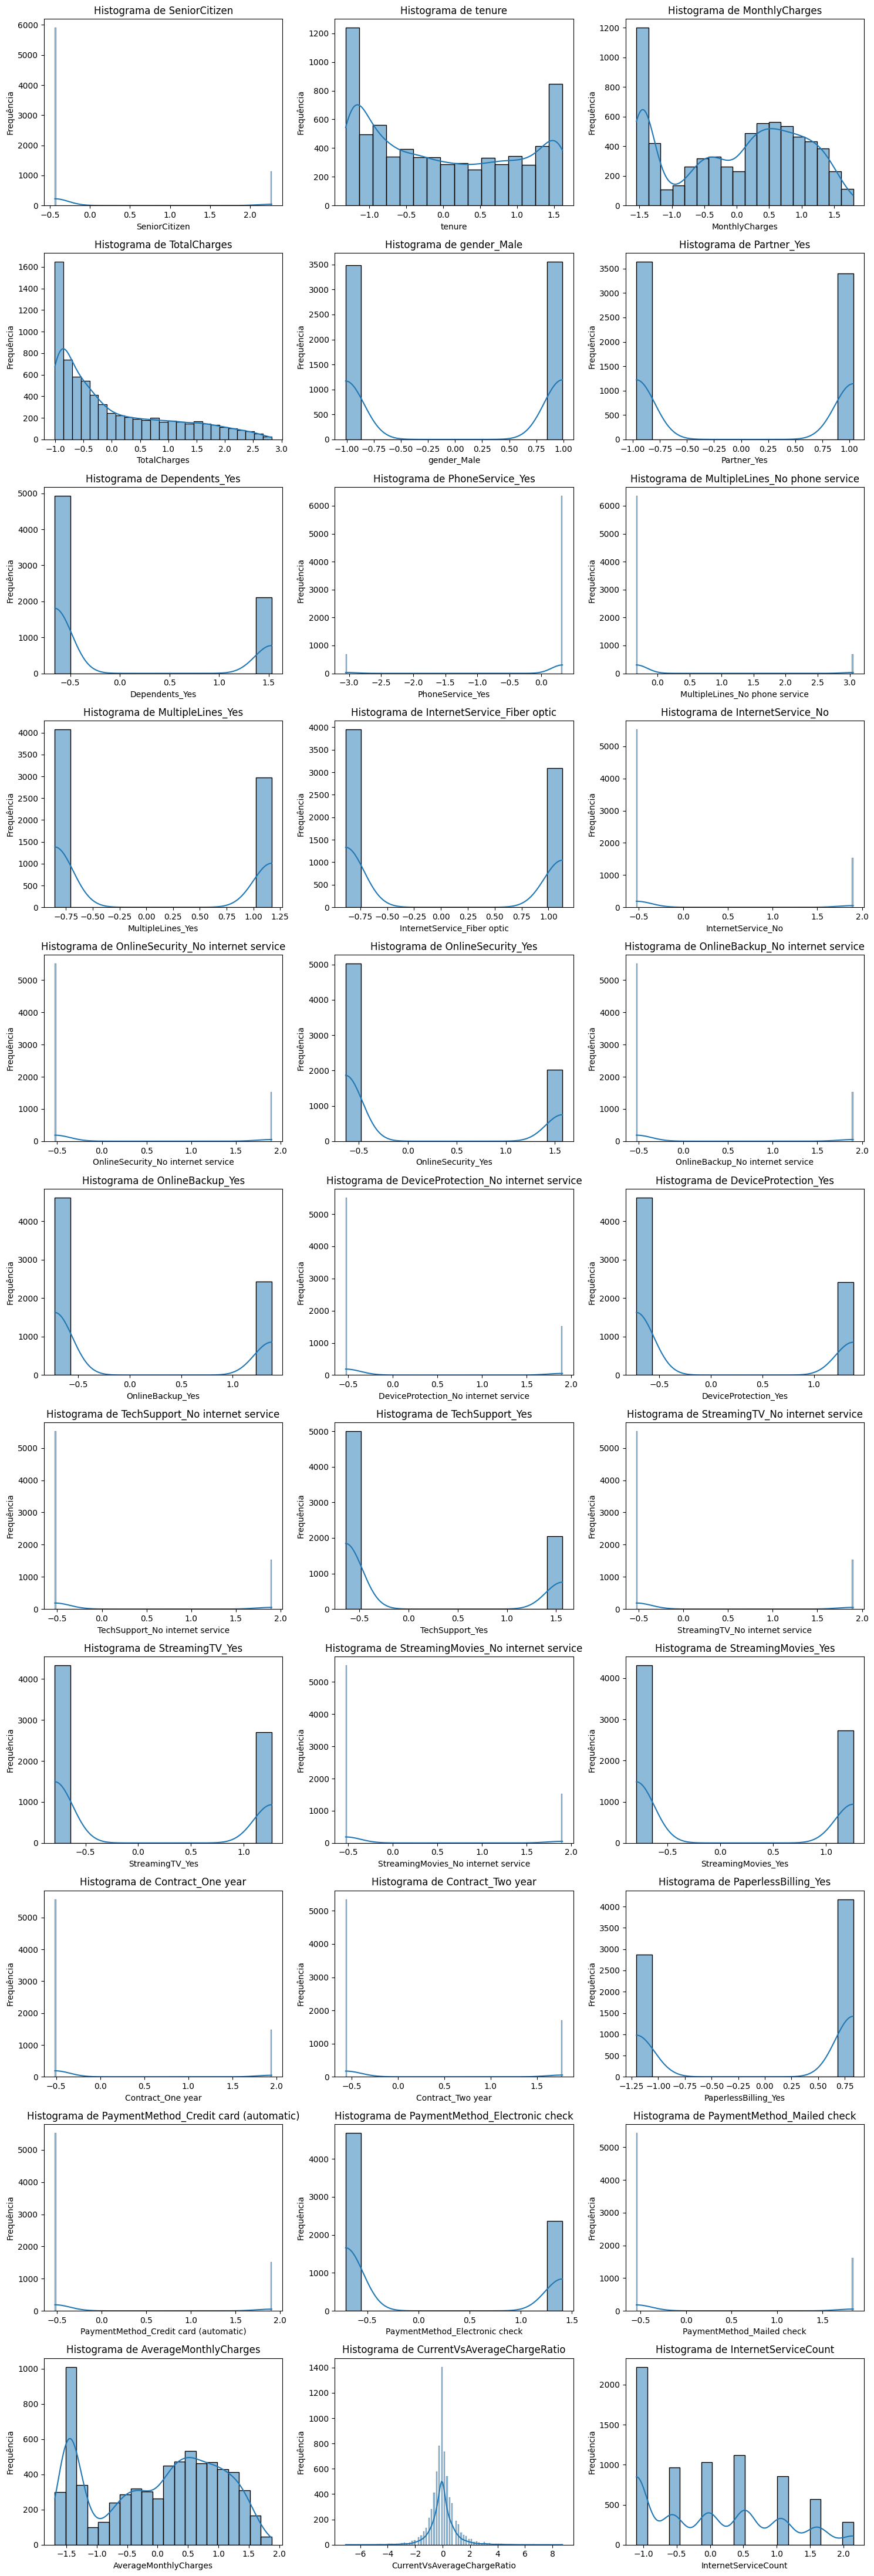

In [24]:
plt.figure(figsize=(n_cols * 5, n_rows * 4))
for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

Boxplot para variáveis numéricas (para identificar outliers e distribuição)


 Gerando Boxplots para variáveis numéricas...


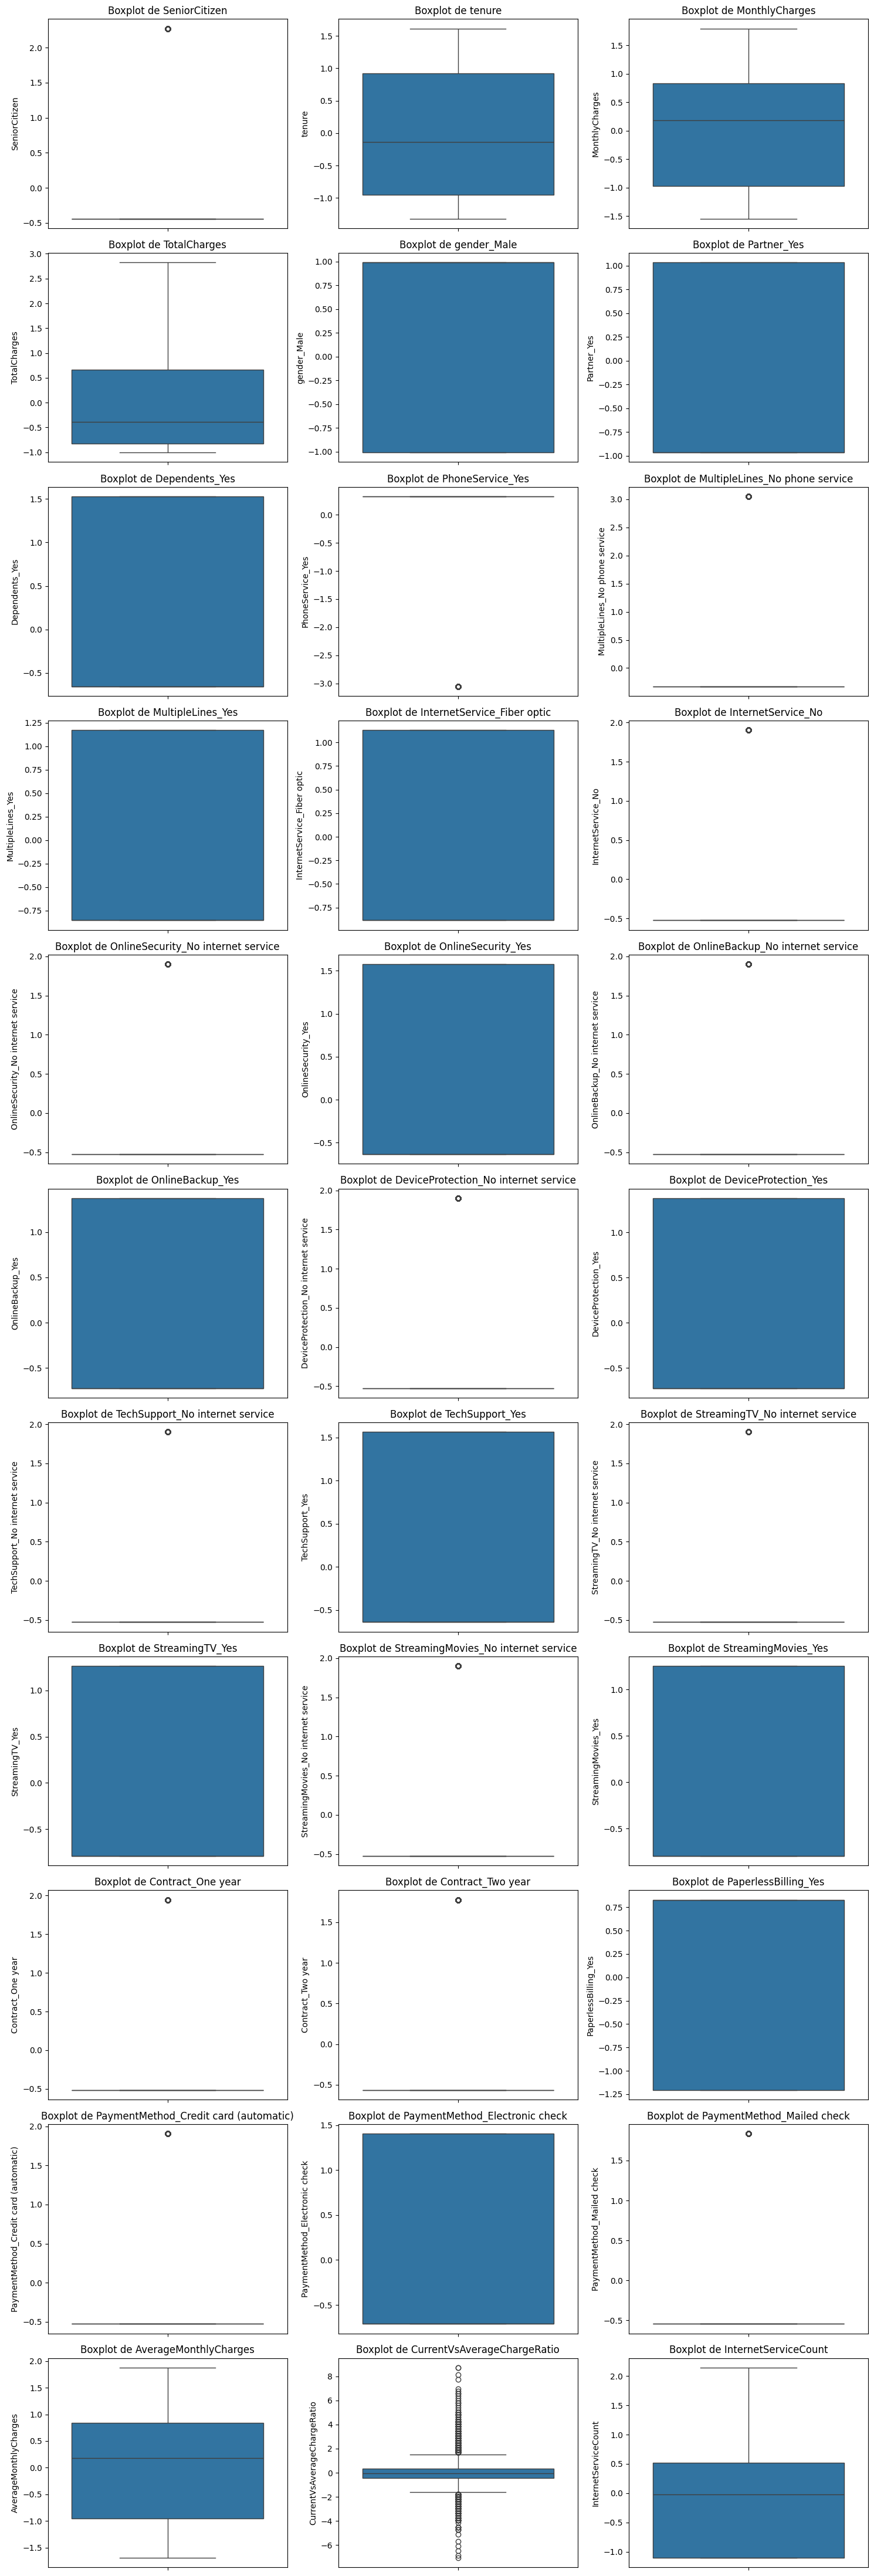

In [25]:
print("\n Gerando Boxplots para variáveis numéricas...")
plt.figure(figsize=(n_cols * 5, n_rows * 4))
for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot de {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

Matriz de Correlação


 Gerando Matriz de Correlação...


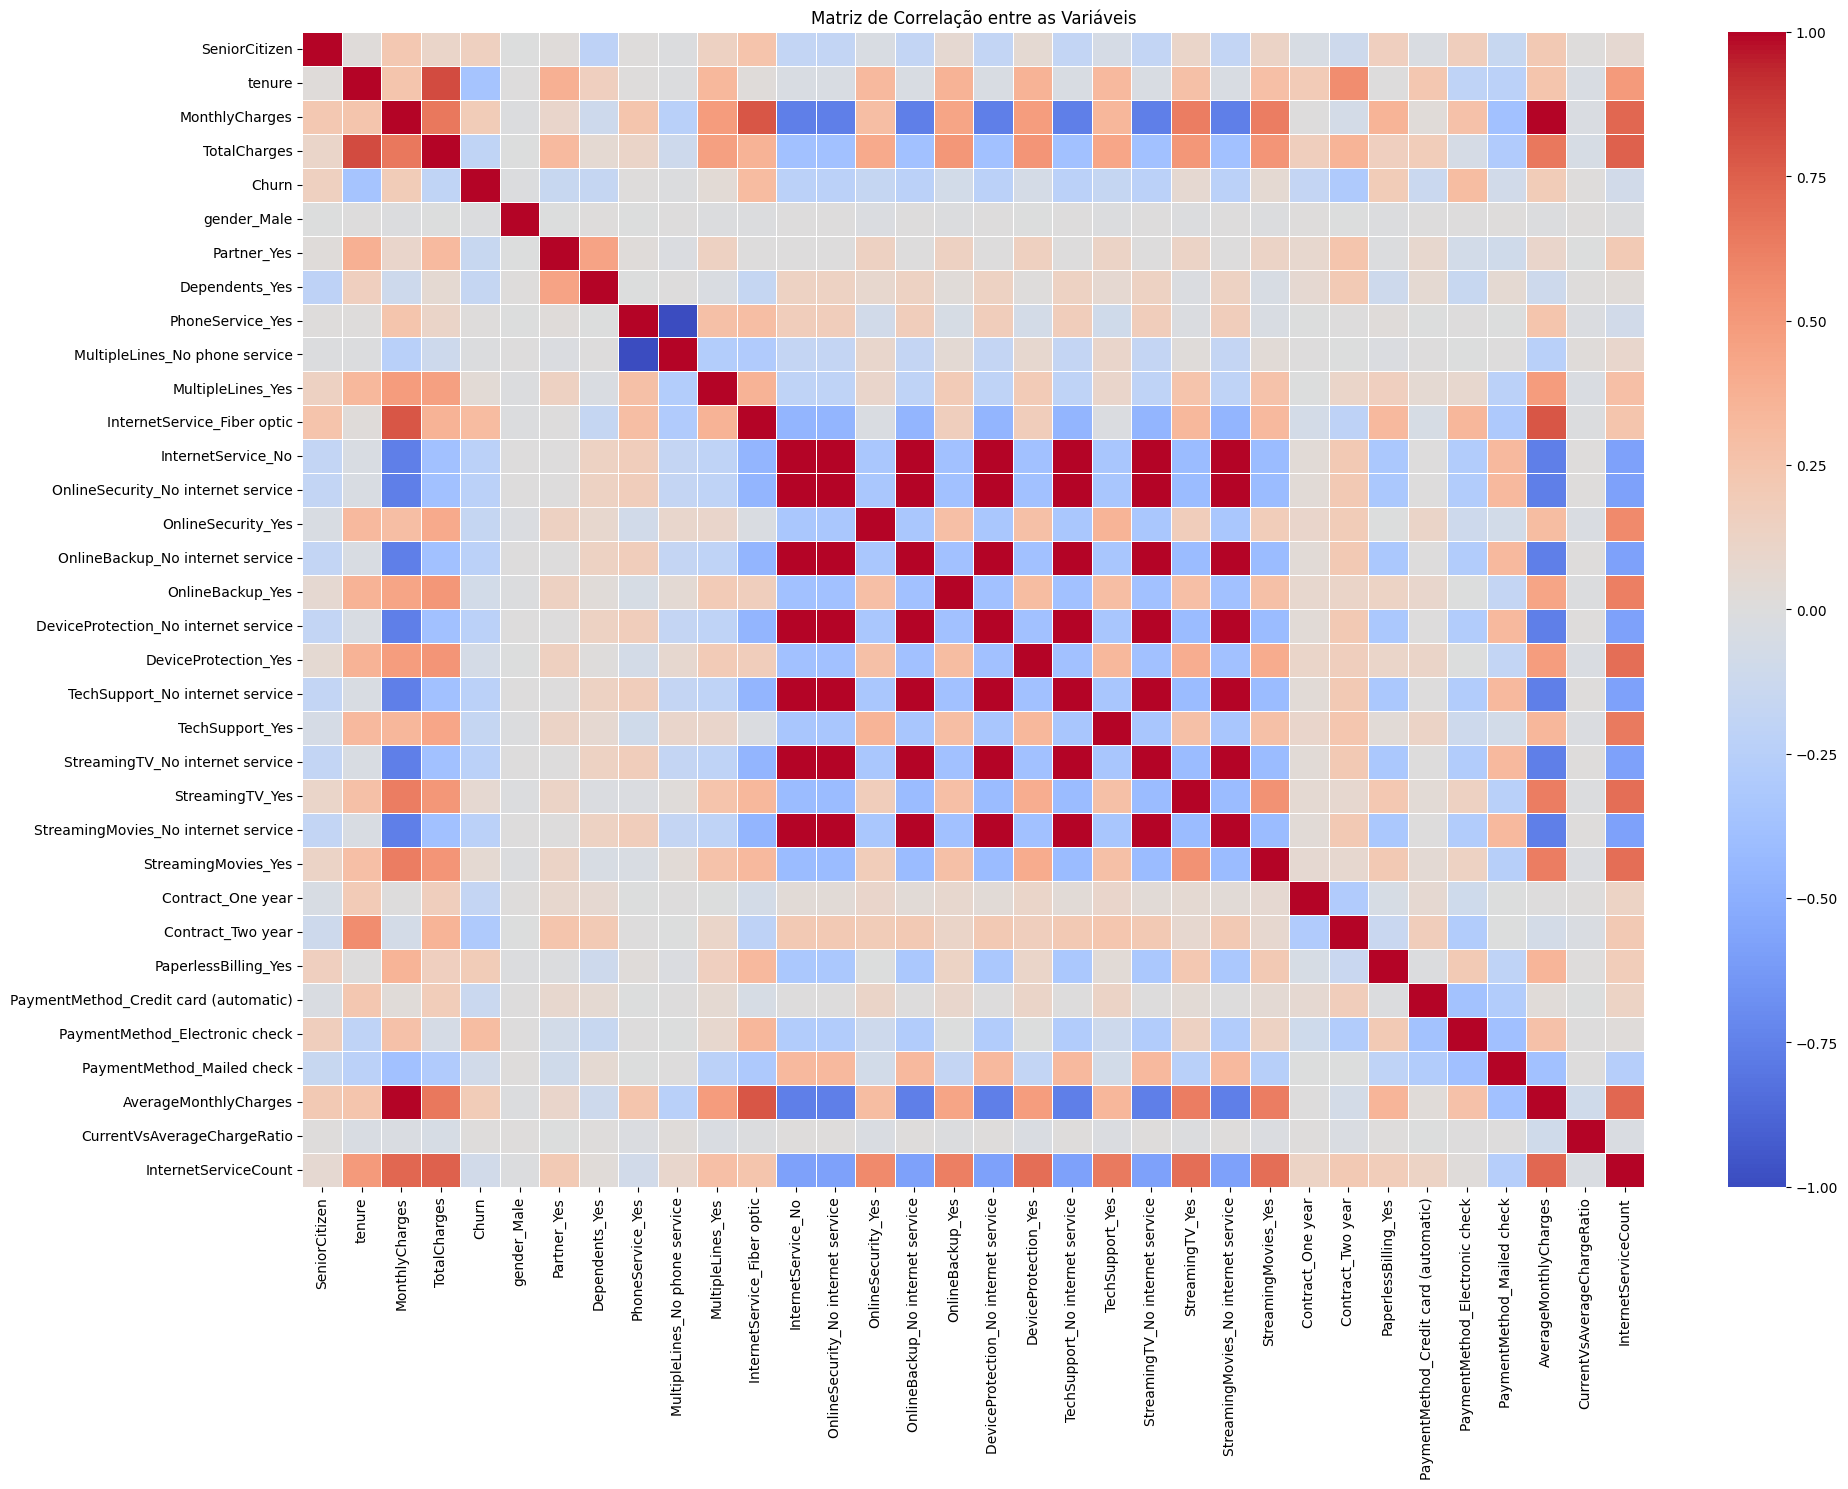

In [26]:
# Calculando a matriz de correlação do DataFrame inteiro (já processado)
print("\n Gerando Matriz de Correlação...")
plt.figure(figsize=(20, 15))
correlation_matrix = df.drop(columns=['customerID']).corr() # Excluímos 'customerID' da correlação
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação entre as Variáveis')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### 4.2 Etapa 2: Engenharia de Atributos e Redução de Dimensionalidade

1. Criar features derivadas, ex.: tempo de contrato em meses, gastos médios.


3 novas features adicionadas durante a etapa 1 para evitar o retrabalho de escalonar os atributos novamente.

2. Selecionar melhores atributos via SelectKBest.


In [27]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

#Separar Features (X) e Variável Alvo (y)
# Excluímos 'customerID' porque é um identificador e não uma feature preditiva.
#'Churn' é a variável alvo (o que queremos prever).

X = df.drop(columns=['customerID', 'Churn']) # Todas as colunas, exceto customerID e Churn
y = df['Churn'] # A variável alvo

print(f"Número total de atributos (features) antes da seleção: {X.shape[1]}")

Número total de atributos (features) antes da seleção: 33


In [28]:
#Escolher a Função de Pontuação e o número de atributos 'k'
# 'f_classif' é adequado para classificação com features numéricas/binárias.
# 'k' = número de atributos que vamos manter.
k_best_features = 15

print(f"\nSelecionando os {k_best_features} melhores atributos com SelectKBest e f_classif...")

#Instanciar SelectKBest
selector = SelectKBest(score_func=f_classif, k=k_best_features)

#Ajustar (Fit) o SelectKBest aos seus dados
# Este passo calcula as pontuações para cada atributo em relação ao alvo 'y'.
selector.fit(X, y)

#Obter os atributos selecionados

# a) Máscara booleana dos atributos selecionados (True para selecionado, False para não)
selected_features_mask = selector.get_support()

# b) Nomes das colunas selecionadas
selected_feature_names = X.columns[selected_features_mask].tolist()

print(f"\nOs {k_best_features} melhores atributos selecionados são:")
print(selected_feature_names)


Selecionando os 15 melhores atributos com SelectKBest e f_classif...

Os 15 melhores atributos selecionados são:
['tenure', 'MonthlyCharges', 'TotalCharges', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service', 'TechSupport_No internet service', 'StreamingTV_No internet service', 'StreamingMovies_No internet service', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Electronic check', 'AverageMonthlyCharges']


In [29]:
#Ver as pontuações de todos os atributos para entender a escolha
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
feature_scores = feature_scores.sort_values(by='Score', ascending=False).reset_index(drop=True)

print("\nPontuações de todos os atributos (ordenadas, maiores pontuações são mais relevantes):")
print(feature_scores)


Pontuações de todos os atributos (ordenadas, maiores pontuações são mais relevantes):
                                  Feature       Score
0                                  tenure  997.268010
1             InternetService_Fiber optic  738.046042
2                       Contract_Two year  707.919254
3          PaymentMethod_Electronic check  706.195028
4         StreamingTV_No internet service  385.698588
5        OnlineBackup_No internet service  385.698588
6    DeviceProtection_No internet service  385.698588
7                      InternetService_No  385.698588
8      OnlineSecurity_No internet service  385.698588
9     StreamingMovies_No internet service  385.698588
10        TechSupport_No internet service  385.698588
11                           TotalCharges  288.278961
12                         MonthlyCharges  273.463704
13                  AverageMonthlyCharges  271.040346
14                   PaperlessBilling_Yes  268.985218
15                      Contract_One year  229.90

In [30]:
#Criar um novo DataFrame com apenas os atributos selecionados
# Este será o DataFrame X que será usado para treinar nossos modelos mais para frente.
X_selected = X[selected_feature_names]

print(f"\nFormato do DataFrame de atributos selecionados: {X_selected.shape}")
print(X_selected.head())


Formato do DataFrame de atributos selecionados: (7043, 15)
     tenure  MonthlyCharges  TotalCharges  InternetService_Fiber optic  \
0 -1.277445       -1.160323     -0.992611                    -0.885660   
1  0.066327       -0.259629     -0.172165                    -0.885660   
2 -1.236724       -0.362660     -0.958066                    -0.885660   
3  0.514251       -0.746535     -0.193672                    -0.885660   
4 -1.236724        0.197365     -0.938874                     1.129102   

   InternetService_No  OnlineSecurity_No internet service  \
0           -0.525927                           -0.525927   
1           -0.525927                           -0.525927   
2           -0.525927                           -0.525927   
3           -0.525927                           -0.525927   
4           -0.525927                           -0.525927   

   OnlineBackup_No internet service  DeviceProtection_No internet service  \
0                         -0.525927                

In [31]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- Aplicando PCA para Visualização 2D ---")

#Instanciar PCA com 2 componentes
# n_components=2 é para visualizarmos em um gráfico 2D.
pca = PCA(n_components=2)

#Ajustar (Fit) e Transformar os dados
X_pca = pca.fit_transform(X_selected)

#Criar um DataFrame para os componentes PCA
df_pca = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])

# Adicionar a variável alvo 'Churn' ao DataFrame PCA para colorir o gráfico
# O .reset_index(drop=True) é para garantir que os índices de 'y' e 'df_pca' se alinhem.
df_pca['Churn'] = y.reset_index(drop=True)

print("PCA aplicado. Primeiras linhas dos componentes principais:")
print(df_pca.head())




--- Aplicando PCA para Visualização 2D ---
PCA aplicado. Primeiras linhas dos componentes principais:
   Principal Component 1  Principal Component 2  Churn
0              -0.423624              -2.561803      0
1              -0.620197              -0.466080      0
2              -0.662306              -1.756857      1
3              -0.351022              -0.368293      0
4              -1.682785              -1.970428      1


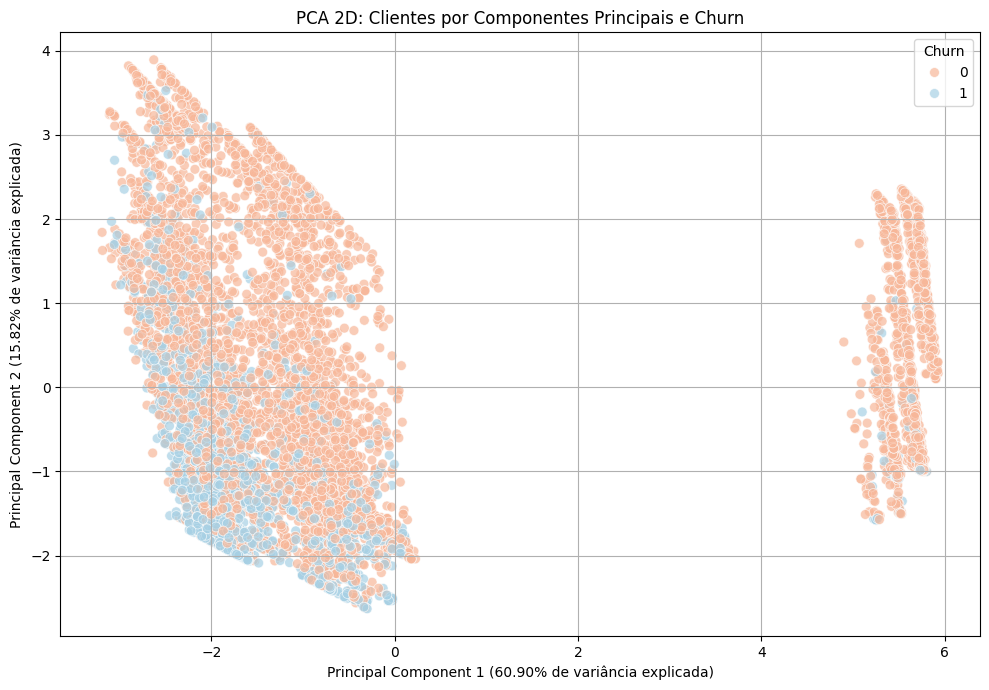

In [32]:
#Visualização 2D dos Componentes Principais
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='Principal Component 1',
    y='Principal Component 2',
    hue='Churn',         # Colorir os pontos pelo valor de Churn
    data=df_pca,
    palette='RdBu',   # Paleta de cores para Churn (pode ser 'coolwarm', 'RdBu', etc.)
    s=50,                # Tamanho dos pontos
    alpha=0.7            # Transparência dos pontos
)
plt.title('PCA 2D: Clientes por Componentes Principais e Churn')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}% de variância explicada)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}% de variância explicada)')
plt.grid(True)
plt.legend(title='Churn', loc='best')
plt.tight_layout()
plt.savefig('pca_2d_visualization.png') # Salva o gráfico como imagem

In [33]:
#Explicar a Variância Acumulada
explained_variance = pca.explained_variance_ratio_
print(f"\nVariância explicada por cada Componente Principal:")
print(f"Componente 1: {explained_variance[0]*100:.2f}%")
print(f"Componente 2: {explained_variance[1]*100:.2f}%")
print(f"Variância acumulada pelos 2 componentes: {explained_variance.sum()*100:.2f}%")


Variância explicada por cada Componente Principal:
Componente 1: 60.90%
Componente 2: 15.82%
Variância acumulada pelos 2 componentes: 76.72%


O PCA age como "resumo visual" dos nossos dados: ele seleciona um punhado de características e as transforma em duas novas "dimensões" (Componentes Principais), que são as mais importantes para explicar a variação dos dados. É feito então um gráfico 2D pra ver se quem deu churn se separa de quem não deu, e as porcentagens nos eixos dizem quanta informação original essas novas dimensões guardam. Isso ajuda a diminuir a quantidade de dados pro modelo e pode até melhorar ele

O gráfico PCA 2D mostra que os dois primeiros componentes explicam cerca de 76.72% da variância dos dados. Observa-se que, enquanto o grande grupo à esquerda apresenta uma mistura de clientes que fazem e não fazem churn (com predominância de não-churn), há um cluster distinto no lado direito (PC1 positivo) que é quase inteiramente composto por clientes que não fizeram churn (vermelho/laranja). Isso sugere que altos valores no PC1 indicam uma forte tendência à permanência do cliente.

### 4.3 Etapa 3: Modelos de Classificação

1. Dividir em treino e teste (e.g. 80%/20%).

In [34]:
from sklearn.model_selection import train_test_split

#Divisão dos dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, # Base de dados com os melhores atributos selecionados
    y, # Variável alvo (Churn)
    test_size=0.20, # 20% para teste
    random_state=42, # Número para reprodutibilidade
    stratify=y       # Para manter a proporção das classes
)

print("Separação dos dados em treino e teste concluída.")

Separação dos dados em treino e teste concluída.


In [35]:
# Exibir as formas dos conjuntos de dados
print(f"Shape de X_train: {X_train.shape}")
print(f"Shape de X_test: {X_test.shape}")
print(f"Shape de y_train: {y_train.shape}")
print(f"Shape de y_test: {y_test.shape}")

Shape de X_train: (5634, 15)
Shape de X_test: (1409, 15)
Shape de y_train: (5634,)
Shape de y_test: (1409,)


In [36]:
# Exibir a proporção das classes nos conjuntos de dados
print("\nProporção das classes no conjunto original:")
print(y.value_counts(normalize=True))
print("\nProporção das classes no conjunto de treino:")
print(y_train.value_counts(normalize=True))
print("\nProporção das classes no conjunto de teste:")
print(y_test.value_counts(normalize=True))


Proporção das classes no conjunto original:
Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

Proporção das classes no conjunto de treino:
Churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64

Proporção das classes no conjunto de teste:
Churn
0    0.734564
1    0.265436
Name: proportion, dtype: float64


2. Treinar 3 modelos: 
- Decision Tree (DecisionTreeClassifier); 



In [37]:
from sklearn.tree import DecisionTreeClassifier

print("\n--- Treinando o modelo Decision Tree Classifier ---")

# 1. Instanciar o modelo Decision Tree Classifier
# Não definimos outros hiperparâmetros aqui, pois o GridSearchCV os ajustará depois.
dtree_model = DecisionTreeClassifier(random_state=42)

# 2. Treinar o modelo (ajustar aos dados de treino)
# O método .fit() é onde o modelo "aprende" os padrões dos seus dados.
dtree_model.fit(X_train, y_train)

print("Modelo Decision Tree Classifier treinado com sucesso!")


--- Treinando o modelo Decision Tree Classifier ---
Modelo Decision Tree Classifier treinado com sucesso!


In [38]:
train_accuracy = dtree_model.score(X_train, y_train)
test_accuracy = dtree_model.score(X_test, y_test)

# Exibir a acurácia do modelo nos conjuntos de treino e teste
print(f"Acurácia no conjunto de treino: {train_accuracy:.4f}")
print(f"Acurácia no conjunto de teste: {test_accuracy:.4f}")

Acurácia no conjunto de treino: 0.9940
Acurácia no conjunto de teste: 0.7360


- Support Vector Machine (SVC)



In [39]:
from sklearn.svm import SVC

print("\n--- Treinando o modelo Support Vector Machine (SVC) ---")

# 1. Instanciar o modelo SVC
svc_model = SVC(random_state=42) # random_state para reprodutibilidade se probability=True for usado, ou cache

# 2. Treinar o modelo (ajustar aos dados de treino)
svc_model.fit(X_train, y_train)

print("Modelo SVC treinado com sucesso!")


--- Treinando o modelo Support Vector Machine (SVC) ---
Modelo SVC treinado com sucesso!


In [40]:
train_accuracy_svc = svc_model.score(X_train, y_train)
test_accuracy_svc = svc_model.score(X_test, y_test)

print(f"Acurácia no conjunto de treino (SVC): {train_accuracy_svc:.4f}")
print(f"Acurácia no conjunto de teste (SVC): {test_accuracy_svc:.4f}")

Acurácia no conjunto de treino (SVC): 0.7966
Acurácia no conjunto de teste (SVC): 0.7857


- Multi-Layer Perceptron (MLPClassifier)



In [41]:
from sklearn.neural_network import MLPClassifier

print("\n--- Treinando o modelo Multi-Layer Perceptron (MLPClassifier) ---")

# 1. Instanciar o modelo MLPClassifier
# Ajustaremos esses hiperparâmetros mais tarde com GridSearchCV.
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# 2. Treinar o modelo (ajustar aos dados de treino)
mlp_model.fit(X_train, y_train)

print("Modelo MLPClassifier treinado com sucesso!")


--- Treinando o modelo Multi-Layer Perceptron (MLPClassifier) ---
Modelo MLPClassifier treinado com sucesso!


In [42]:
train_accuracy_mlp = mlp_model.score(X_train, y_train)
test_accuracy_mlp = mlp_model.score(X_test, y_test)

print(f"Acurácia no conjunto de treino (MLPClassifier): {train_accuracy_mlp:.4f}")
print(f"Acurácia no conjunto de teste (MLPClassifier): {test_accuracy_mlp:.4f}")

Acurácia no conjunto de treino (MLPClassifier): 0.8048
Acurácia no conjunto de teste (MLPClassifier): 0.7928


3.  Realizar GridSearchCV para ajuste de hiperparâmetros

- Decision Tree com a melhor combinação de hiperparâmetros


In [43]:
from sklearn.model_selection import GridSearchCV

print("\n--- Iniciando GridSearchCV para Decision Tree ---")

# Definir o modelo base
dtree = DecisionTreeClassifier(random_state=42)

# Definir o grid de hiperparâmetros para Decision Tree
param_grid_dtree = {
    'criterion': ['gini', 'entropy'], # Critério para medir a qualidade de uma divisão
    'max_depth': [None, 5, 10, 15, 20], # Profundidade máxima da árvore (None = sem limite)
    'min_samples_leaf': [1, 5, 10, 20], # Número mínimo de amostras necessárias para estar em um nó folha
    'min_samples_split': [2, 5, 10] # Número mínimo de amostras para dividir um nó
}

# Configurar e executar GridSearchCV
grid_search_dtree = GridSearchCV(
    estimator=dtree,
    param_grid=param_grid_dtree,
    cv=5,                 # 5-fold cross-validation
    scoring='roc_auc',    # Métrica para otimizar (ROC AUC é bom para desbalanceamento)
    n_jobs=-1,            # Usar todos os núcleos da CPU
    verbose=2             # Exibir progresso
)

grid_search_dtree.fit(X_train, y_train)

print("\nMelhor modelo Decision Tree treinado e otimizado com GridSearchCV.")


--- Iniciando GridSearchCV para Decision Tree ---
Fitting 5 folds for each of 120 candidates, totalling 600 fits

Melhor modelo Decision Tree treinado e otimizado com GridSearchCV.


In [44]:
print("\n--- Resultados do GridSearchCV para Decision Tree ---")
print(f"Melhores parâmetros encontrados: {grid_search_dtree.best_params_}")
print(f"Melhor pontuação (ROC AUC) no treino (CV): {grid_search_dtree.best_score_:.4f}")

# Armazenar o melhor modelo encontrado pelo GridSearchCV para avaliação posterior
best_dtree_model = grid_search_dtree.best_estimator_


--- Resultados do GridSearchCV para Decision Tree ---
Melhores parâmetros encontrados: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 2}
Melhor pontuação (ROC AUC) no treino (CV): 0.8288


- Support Vector Machine com a melhor combinação de hiperparâmetros

In [45]:

print("\n--- Iniciando GridSearchCV para SVC ---")

# Definir o modelo base SVC
svc = SVC(random_state=42)

# Definir o grid de hiperparâmetros para SVC
param_grid_svc = {
    'C': [0.1, 1, 10], # Parâmetro de regularização (menor C = mais regularização)
    'kernel': ['rbf', 'linear'], # Tipo de kernel (rbf é comum, linear para separação linear)
    'gamma': ['scale', 'auto', 0.1, 1], # Coeficiente do kernel para 'rbf', 'poly', 'sigmoid'
    'probability': [True] # Habilitar probabilidade para usar com ROC AUC
}

# Configurar e executar GridSearchCV
grid_search_svc = GridSearchCV(
    estimator=svc,
    param_grid=param_grid_svc,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)

grid_search_svc.fit(X_train, y_train)

print("\nMelhor modelo SVC treinado e otimizado com GridSearchCV.")


--- Iniciando GridSearchCV para SVC ---
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Melhor modelo SVC treinado e otimizado com GridSearchCV.


In [46]:
print("\n--- Resultados do GridSearchCV para SVC ---")
print(f"Melhores parâmetros encontrados: {grid_search_svc.best_params_}")
print(f"Melhor pontuação (ROC AUC) no treino (CV): {grid_search_svc.best_score_:.4f}")

# Armazenar o melhor modelo encontrado pelo GridSearchCV para avaliação posterior
best_svc_model = grid_search_svc.best_estimator_


--- Resultados do GridSearchCV para SVC ---
Melhores parâmetros encontrados: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear', 'probability': True}
Melhor pontuação (ROC AUC) no treino (CV): 0.8188


- Multi-Layer Perceptron com a melhor combinação de hiperparâmetros

In [47]:

print("\n--- Iniciando GridSearchCV para MLPClassifier ---")

# Definir o modelo base
mlp = MLPClassifier(random_state=42, max_iter=1000) # Aumentado max_iter para melhor convergência

# Definir o grid de hiperparâmetros para MLPClassifier
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)], # Diferentes arquiteturas de camadas ocultas
    'activation': ['relu', 'tanh'], # Função de ativação para as camadas ocultas
    'alpha': [0.0001, 0.001, 0.01], # Parâmetro de regularização L2 (menor alpha = menos regularização)
    'learning_rate': ['constant', 'adaptive'] # Taxa de aprendizado
}

# Configurar e executar GridSearchCV
grid_search_mlp = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid_mlp,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)

grid_search_mlp.fit(X_train, y_train)

print("\nMelhor modelo MLPClassifier treinado e otimizado com GridSearchCV.")


--- Iniciando GridSearchCV para MLPClassifier ---
Fitting 5 folds for each of 48 candidates, totalling 240 fits

Melhor modelo MLPClassifier treinado e otimizado com GridSearchCV.


In [48]:
print("\n--- Resultados do GridSearchCV para MLPClassifier ---")
print(f"Melhores parâmetros encontrados: {grid_search_mlp.best_params_}")
print(f"Melhor pontuação (ROC AUC) no treino (CV): {grid_search_mlp.best_score_:.4f}")

# Armazenar o melhor modelo encontrado pelo GridSearchCV para avaliação posterior
best_mlp_model = grid_search_mlp.best_estimator_


--- Resultados do GridSearchCV para MLPClassifier ---
Melhores parâmetros encontrados: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
Melhor pontuação (ROC AUC) no treino (CV): 0.8374


4. Avaliar desempenho com:

• Matriz de Confusão

• Precision, Recall, F1-Score

• ROC-AUC

In [49]:

#Importandos as bibliotecas necessárias para avaliação dos modelos
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score,
    auc # para calcular a área sob a curva ROC se usar roc_curve
)
print("Bibliotecas importadas com sucesso")

Bibliotecas importadas com sucesso


In [50]:

# --- Função Auxiliar para Plotar Matriz de Confusão ---
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Previsto: 0 (Não Churn)', 'Previsto: 1 (Churn)'],
                yticklabels=['Real: 0 (Não Churn)', 'Real: 1 (Churn)'])
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.ylabel('Valores Reais')
    plt.xlabel('Valores Previstos')
    plt.show()

print("Criação de função auxiliar para plotar matriz de confusão concluída")

Criação de função auxiliar para plotar matriz de confusão concluída


In [51]:

# --- Função Auxiliar para Plotar Curva ROC ---
def plot_roc_curve(fpr, tpr, roc_auc, model_name):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (área = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falsos Positivos (False Positive Rate)')
    plt.ylabel('Taxa de Verdadeiros Positivos (True Positive Rate) / Recall')
    plt.title(f'Curva ROC - {model_name}')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

print("Criação de função auxiliar para plotar curva ROC concluída")

Criação de função auxiliar para plotar curva ROC concluída


Avaliando: Decision Tree Classifier

In [52]:
model = best_dtree_model # Seleciona o melhor modelo de Decision Tree

#Fazer Previsões
y_pred_dtree = model.predict(X_test)

# Para ROC AUC, precisamos das probabilidades da classe positiva (Churn=1)
if hasattr(model, 'predict_proba'):
    y_pred_proba_dtree = model.predict_proba(X_test)[:, 1] # Probabilidade da classe positiva (1)
else:
    print("Atenção: O modelo Decision Tree Classifier não suporta predict_proba. ROC-AUC não será calculado.")
    y_pred_proba_dtree = None

print("Previsões feitas com sucesso pelo modelo Decision Tree.")

Previsões feitas com sucesso pelo modelo Decision Tree.


Criação da matriz de confusão para o modelo Decision Tree Classifier

Matriz de Confusão (Decision Tree Classifier):
[[919 116]
 [174 200]]


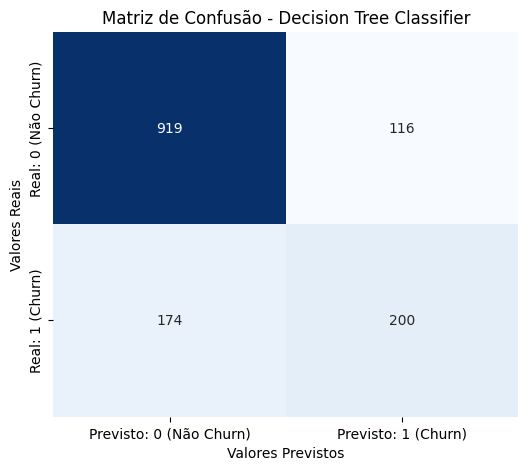

In [53]:

print("Criação da matriz de confusão para o modelo Decision Tree Classifier")
#Matriz de Confusão
cm_dtree = confusion_matrix(y_test, y_pred_dtree)
print("\nMatriz de Confusão (Decision Tree Classifier):")
print(cm_dtree)
plot_confusion_matrix(cm_dtree, "Decision Tree Classifier")

In [54]:

# 3. Precision, Recall, F1-Score (via Classification Report)
print("\nRelatório de Classificação (Decision Tree Classifier):")
print(classification_report(y_test, y_pred_dtree))


Relatório de Classificação (Decision Tree Classifier):
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.63      0.53      0.58       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409




ROC AUC (Decision Tree Classifier): 0.8300


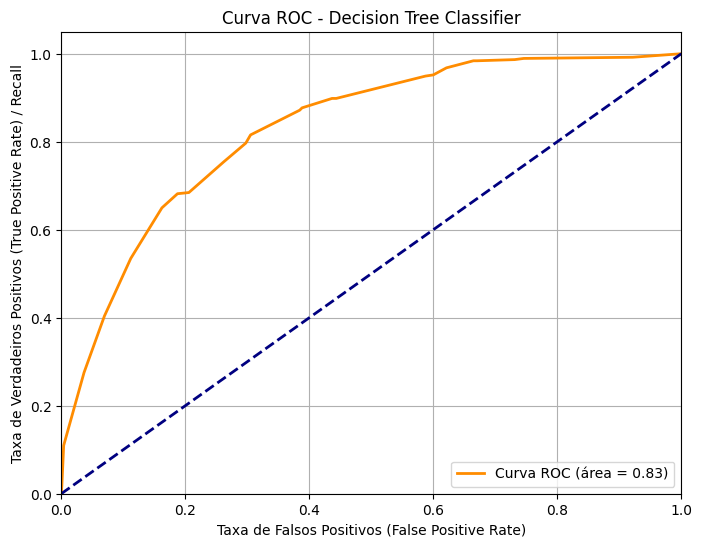

In [55]:

# 4. ROC-AUC
if y_pred_proba_dtree is not None:
    roc_auc_dtree = roc_auc_score(y_test, y_pred_proba_dtree)
    print(f"\nROC AUC (Decision Tree Classifier): {roc_auc_dtree:.4f}")
    fpr_dtree, tpr_dtree, thresholds_dtree = roc_curve(y_test, y_pred_proba_dtree)
    plot_roc_curve(fpr_dtree, tpr_dtree, roc_auc_dtree, "Decision Tree Classifier")

# Mede a capacidade do modelo de distinguir entre as classes. Quanto mais a curva se aproxima do canto superior esquerdo (área maior), melhor o modelo.

Avaliando o modelo SVC

In [56]:

model = best_svc_model # Seleciona o melhor modelo de SVC

#Fazer Previsões
y_pred_svc = model.predict(X_test)

# Para ROC AUC, precisamos das probabilidades da classe positiva (Churn=1)
if hasattr(model, 'predict_proba'):
    y_pred_proba_svc = model.predict_proba(X_test)[:, 1] # Probabilidade da classe positiva (1)
else:
    print("Atenção: O modelo SVC não suporta predict_proba. ROC-AUC não será calculado.")
    y_pred_proba_svc = None

print("Previsões feitas com sucesso pelo modelo SVC.")

Previsões feitas com sucesso pelo modelo SVC.



Matriz de Confusão (SVC):
[[907 128]
 [182 192]]


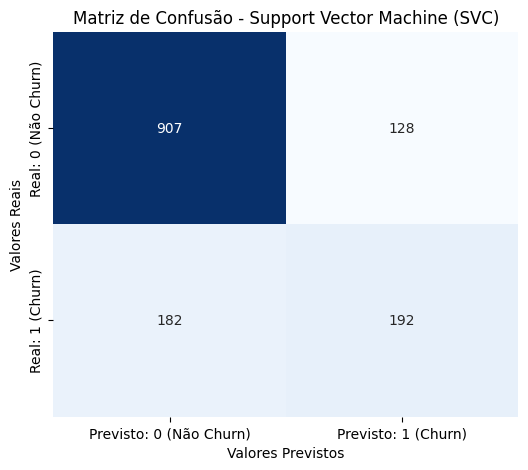

In [57]:

#Matriz de Confusão
cm_svc = confusion_matrix(y_test, y_pred_svc)
print("\nMatriz de Confusão (SVC):")
print(cm_svc)
plot_confusion_matrix(cm_svc, "Support Vector Machine (SVC)")

In [58]:
#Precision, Recall, F1-Score (via Classification Report)
print("\nRelatório de Classificação (SVC):")
print(classification_report(y_test, y_pred_svc))


Relatório de Classificação (SVC):
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1035
           1       0.60      0.51      0.55       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409




ROC AUC (SVC): 0.8152


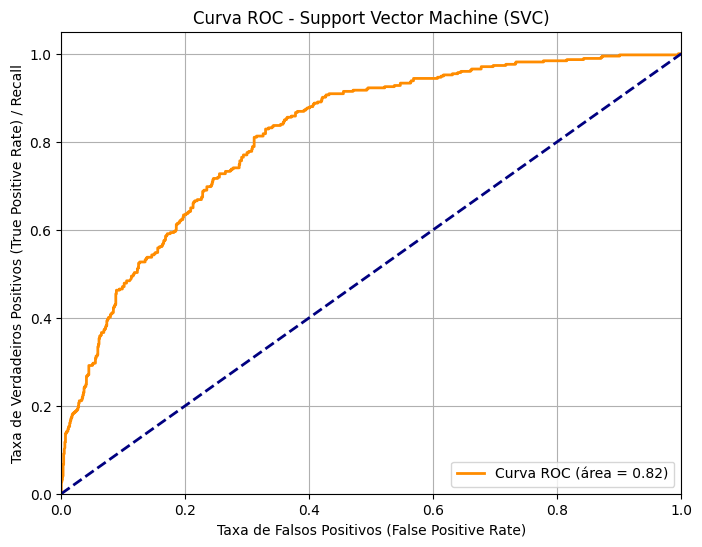

In [59]:
#ROC-AUC
if y_pred_proba_svc is not None:
    roc_auc_svc = roc_auc_score(y_test, y_pred_proba_svc)
    print(f"\nROC AUC (SVC): {roc_auc_svc:.4f}")
    fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, y_pred_proba_svc)
    plot_roc_curve(fpr_svc, tpr_svc, roc_auc_svc, "Support Vector Machine (SVC)")

Avaliando o modelo MLPClassifier

In [60]:
model = best_mlp_model # Seleciona o melhor modelo de MLPClassifier

#Fazer Previsões
y_pred_mlp = model.predict(X_test)

# Para ROC AUC, precisamos das probabilidades da classe positiva (Churn=1)
if hasattr(model, 'predict_proba'):
    y_pred_proba_mlp = model.predict_proba(X_test)[:, 1] # Probabilidade da classe positiva (1)
else:
    print("Atenção: O modelo MLPClassifier não suporta predict_proba. ROC-AUC não será calculado.")
    y_pred_proba_mlp = None

print("Previsões feitas com sucesso pelo modelo MLPClassifier.")

Previsões feitas com sucesso pelo modelo MLPClassifier.



Matriz de Confusão (MLPClassifier):
[[929 106]
 [190 184]]


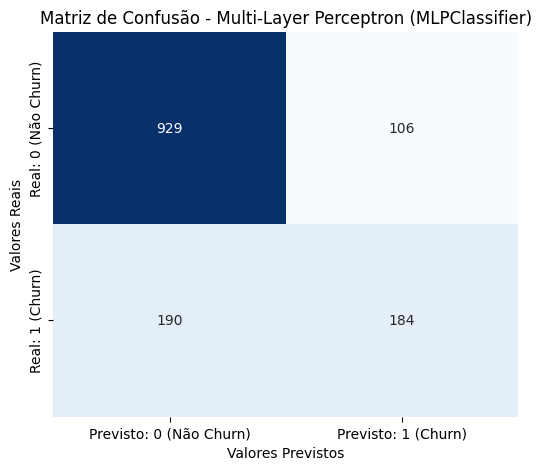

In [61]:
#Matriz de Confusão
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
print("\nMatriz de Confusão (MLPClassifier):")
print(cm_mlp)
plot_confusion_matrix(cm_mlp, "Multi-Layer Perceptron (MLPClassifier)")

In [62]:
#Precision, Recall, F1-Score (via Classification Report)
print("\nRelatório de Classificação (MLPClassifier):")
print(classification_report(y_test, y_pred_mlp))


Relatório de Classificação (MLPClassifier):
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409




ROC AUC (MLPClassifier): 0.8384


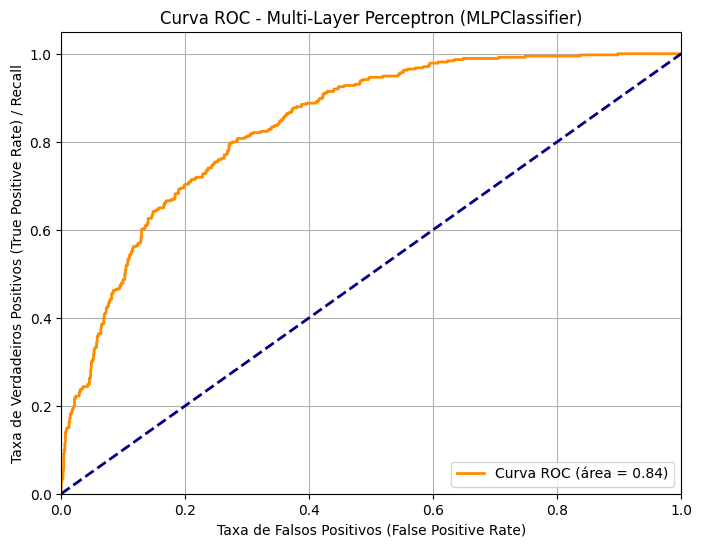

In [63]:
#ROC-AUC
if y_pred_proba_mlp is not None:
    roc_auc_mlp = roc_auc_score(y_test, y_pred_proba_mlp)
    print(f"\nROC AUC (MLPClassifier): {roc_auc_mlp:.4f}")
    fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, y_pred_proba_mlp)
    plot_roc_curve(fpr_mlp, tpr_mlp, roc_auc_mlp, "Multi-Layer Perceptron (MLPClassifier)")

### 4.4 Etapa 4: Clustering e Segmentação

1. Aplicar KMeans para segmentar a base completa (sem churn)

In [64]:
from sklearn.cluster import KMeans

# Removendo o churn da base, e o customerID também pois não é um atributo numérico útil para o KMeans
df_sem_churn = df.drop(columns=['customerID', 'Churn'])

k = 10
quantidade_execucoes_kmeans = 2

kmeans = KMeans(n_clusters=k, n_init=quantidade_execucoes_kmeans, random_state=0)
df['Cluster_KMeans'] = kmeans.fit_predict(df_sem_churn)

3. Analisar cada cluster

In [70]:
for cluster in range(k):
    
    cluster_mask = df['Cluster_KMeans'] == cluster
    taxa_churn = df.loc[cluster_mask, 'Churn'].mean()
    receita_media = df.loc[cluster_mask, 'MonthlyCharges'].mean()

    uso_servicos = {
        'DSL': f"{float(df.loc[cluster_mask, 'InternetService_Fiber optic'].mean()):.2f}",
        'Telefonia': f"{float(df.loc[cluster_mask, 'PhoneService_Yes'].mean()):.2f}",
        'StreamingTV': f"{float(df.loc[cluster_mask, 'StreamingTV_Yes'].mean()):.2f}",
        'StreamingMovies': f"{float(df.loc[cluster_mask, 'StreamingMovies_Yes'].mean()):.2f}",
    }

    print(f"\nCluster {cluster}:")
    print(f"Taxa média de churn: {taxa_churn:.2f}")
    print(f"Receita média mensal: {receita_media:.2f}")
    print(f"Uso médio de serviços extras: {uso_servicos}")


Cluster 0:
Taxa média de churn: 0.05
Receita média mensal: -1.44
Uso médio de serviços extras: {'DSL': '-0.89', 'Telefonia': '0.33', 'StreamingTV': '-0.79', 'StreamingMovies': '-0.80'}

Cluster 1:
Taxa média de churn: 0.10
Receita média mensal: 0.09
Uso médio de serviços extras: {'DSL': '-0.64', 'Telefonia': '0.33', 'StreamingTV': '-0.20', 'StreamingMovies': '-0.15'}

Cluster 2:
Taxa média de churn: 0.18
Receita média mensal: 1.06
Uso médio de serviços extras: {'DSL': '0.79', 'Telefonia': '0.33', 'StreamingTV': '0.83', 'StreamingMovies': '0.85'}

Cluster 3:
Taxa média de churn: 0.05
Receita média mensal: 0.98
Uso médio de serviços extras: {'DSL': '0.17', 'Telefonia': '0.33', 'StreamingTV': '0.90', 'StreamingMovies': '0.89'}

Cluster 4:
Taxa média de churn: 0.10
Receita média mensal: -1.46
Uso médio de serviços extras: {'DSL': '-0.89', 'Telefonia': '0.33', 'StreamingTV': '-0.79', 'StreamingMovies': '-0.80'}

Cluster 5:
Taxa média de churn: 0.34
Receita média mensal: -0.30
Uso médio de 

4. Visualizar clusters em 2D PCA

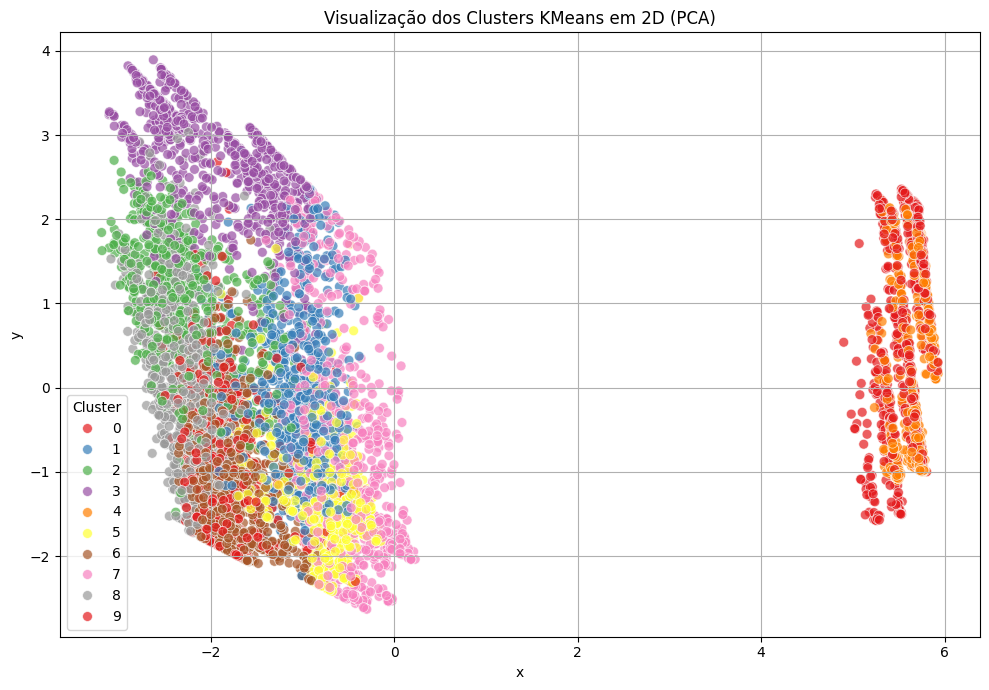

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='Principal Component 1',
    y='Principal Component 2',
    hue=df['Cluster_KMeans'],
    data=df_pca,
	palette='Set1',
    s=50,
    alpha=0.7
)

plt.title('Visualização dos Clusters KMeans em 2D (PCA)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()